In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
mal_df = pd.read_csv('mal_df_20200920.csv')
mal_df 

,users_votes,score,popularity,favorites,episode,year,members,source_Manga,source_Original,source_Other,studios_Madhouse,studios_Others,studios_Production I.G,studios_Sunrise,studios_Toei Animation,premiered_Spring,premiered_Summer,premiered_Winter
0,147,6.23,12129,0,44.0,1987.0,423,0,0,1,0,1,0,0,0,0,0,0
1,169,5.36,12000,1,10.0,2015.0,443,0,0,1,0,1,0,0,0,0,0,0
2,120,5.98,11765,1,300.0,1971.0,486,0,0,1,0,1,0,0,0,0,0,1
3,154,5.82,11681,0,1428.0,1976.0,501,0,0,1,0,1,0,0,0,0,0,0
4,140,6.40,11667,3,56.0,1980.0,506,0,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1768,889442,8.18,12,44237,13.0,2010.0,1439153,0,1,0,0,1,0,0,0,1,0,0
1769,858736,9.13,8,135751,24.0,2011.0,1580249,0,0,1,0,1,0,0,0,1,0,0
1770,1060535,8.19,7,43353,13.0,2016.0,1598432,1,0,0,0,1,0,0,0,1,0,0
1771,1184256,9.22,4,162826,64.0,2009.0,1948924,1,0,0,0,1,0,0,0,1,0,0


In [ ]:
mal_df.info()

In [ ]:
mal_df.describe()

In [4]:
mal_df.favorites = mal_df.favorites.values+1
mal_df.favorites

0            1
1            2
2            2
3            1
4            4
         ...  
1768     44238
1769    135752
1770     43354
1771    162827
1772    100516
Name: favorites, Length: 1773, dtype: int64

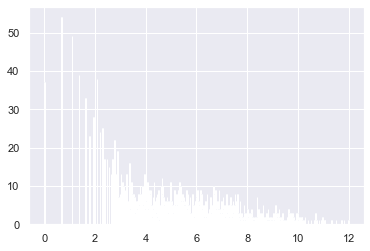

In [5]:
fig = np.log(mal_df.favorites).hist(bins=500)

In [6]:
#feature engineering: adding polynomial terms
mal_df['members_log']=np.log(mal_df.members)
mal_df['users_votes_log']=np.log(mal_df.users_votes)
mal_df['favorites_log']=np.log(mal_df.favorites)
mal_df

,users_votes,score,popularity,favorites,episode,year,members,source_Manga,source_Original,source_Other,...,studios_Others,studios_Production I.G,studios_Sunrise,studios_Toei Animation,premiered_Spring,premiered_Summer,premiered_Winter,members_log,users_votes_log,favorites_log
0,147,6.23,12129,1,44.0,1987.0,423,0,0,1,...,1,0,0,0,0,0,0,6.047372,4.990433,0.000000
1,169,5.36,12000,2,10.0,2015.0,443,0,0,1,...,1,0,0,0,0,0,0,6.093570,5.129899,0.693147
2,120,5.98,11765,2,300.0,1971.0,486,0,0,1,...,1,0,0,0,0,0,1,6.186209,4.787492,0.693147
3,154,5.82,11681,1,1428.0,1976.0,501,0,0,1,...,1,0,0,0,0,0,0,6.216606,5.036953,0.000000
4,140,6.40,11667,4,56.0,1980.0,506,0,0,1,...,1,0,0,0,0,0,0,6.226537,4.941642,1.386294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1768,889442,8.18,12,44238,13.0,2010.0,1439153,0,1,0,...,1,0,0,0,1,0,0,14.179565,13.698350,10.697339
1769,858736,9.13,8,135752,24.0,2011.0,1580249,0,0,1,...,1,0,0,0,1,0,0,14.273093,13.663217,11.818585
1770,1060535,8.19,7,43354,13.0,2016.0,1598432,1,0,0,...,1,0,0,0,1,0,0,14.284534,13.874284,10.677154
1771,1184256,9.22,4,162827,64.0,2009.0,1948924,1,0,0,...,1,0,0,0,1,0,0,14.482788,13.984625,12.000444


In [7]:
y=mal_df['score']
x1=mal_df.drop(['score'],axis=1)
x=sm.add_constant(x1)
results=sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     173.8
Date:                Sun, 20 Sep 2020   Prob (F-statistic):               0.00
Time:                        13:08:54   Log-Likelihood:                -1093.7
No. Observations:                1773   AIC:                             2229.
Df Residuals:                    1752   BIC:                             2344.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     22.1620      2.616      8.472      0.000      17.031      27.293
users_votes            -4.891e-07   7.57e-07     -0.646      0.518   -1.97e-06    9.95e-07
popularity             -2.428e-05   3.32e-05     -0.731      0.465   -8.94e-05    4.09e-05
favorites               6.207e-06   2.41e-06      2.577      0.010    1.48e-06    1.09e-05
episode                   -0.0003   9.98e-05     -2.950      0.003      -0.000   -9.86e-05
year                      -0.0066      0.001     -5.313      0.000      -0.009      -0.004
members                -1.274e-07   5.76e-07     -0.221      0.825   -1.26e-06       1e-06
source_Manga               0.1101      0.041      2.679      0.007       0.029       0.191
source_Original           -0.0347      0.046     -0.755      0.450      -0.125       0.055
source_Other              -0.0313      0.044     -0.715      0.475      -0.117       0.055
studios_Madhouse           0.0059      0.074      0.080      0.936      -0.139       0.151
studios_Others            -0.0963      0.054     -1.782      0.075      -0.202       0.010
studios_Production I.G     0.2297      0.090      2.561      0.011       0.054       0.406
studios_Sunrise            0.0417      0.078      0.536      0.592      -0.111       0.194
studios_Toei Animation    -0.0611      0.069     -0.889      0.374      -0.196       0.074
premiered_Spring           0.0197      0.027      0.716      0.474      -0.034       0.074
premiered_Summer          -0.0322      0.032     -0.999      0.318      -0.095       0.031
premiered_Winter          -0.0080      0.031     -0.255      0.799      -0.069       0.053
members_log               -0.6438      0.088     -7.336      0.000      -0.816      -0.472
users_votes_log            0.3003      0.039      7.739      0.000       0.224       0.376
favorites_log              0.4423      0.015     28.739      0.000       0.412       0.473
==============================================================================
Omnibus:                      165.139   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              352.642
Skew:                          -0.579   Prob(JB):                     2.66e-77
Kurtosis:                       4.852   Cond. No.                     7.01e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
pd.set_option('display.max_columns', None)
mal_df.corr()

,users_votes,score,popularity,favorites,episode,year,members,source_Manga,source_Original,source_Other,studios_Madhouse,studios_Others,studios_Production I.G,studios_Sunrise,studios_Toei Animation,premiered_Spring,premiered_Summer,premiered_Winter,members_log,users_votes_log,favorites_log
users_votes,1.000000,0.470447,-0.466015,0.782002,-0.020795,0.193074,0.988689,0.112577,-0.098230,-0.168604,0.037237,0.003715,0.042486,-0.003276,-0.094057,0.008620,0.017780,-0.038637,0.632272,0.635165,0.676477
score,0.470447,1.000000,-0.553267,0.380313,-0.010455,0.049248,0.508046,0.276140,-0.118453,-0.245255,0.089765,-0.128454,0.097210,0.070118,-0.027542,0.032931,-0.021924,-0.064614,0.603644,0.612606,0.739630
popularity,-0.466015,-0.553267,1.000000,-0.250680,0.128288,-0.528616,-0.523173,-0.217904,0.143003,0.264873,-0.039415,-0.077055,-0.070965,0.061241,0.229932,0.054223,-0.106956,0.046167,-0.970369,-0.961293,-0.883539
favorites,0.782002,0.380313,-0.250680,1.000000,0.026357,0.063393,0.778146,0.072868,-0.021547,-0.086825,0.049212,-0.025820,0.009823,0.054613,-0.046382,0.047250,-0.033241,-0.050554,0.376224,0.372899,0.462991
episode,-0.020795,-0.010455,0.128288,0.026357,1.000000,-0.235894,-0.023276,0.025702,-0.019664,0.026027,-0.010087,-0.009499,-0.023447,0.021130,0.045011,0.028123,-0.069356,-0.010083,-0.110816,-0.108691,-0.049865
year,0.193074,0.049248,-0.528616,0.063393,-0.235894,1.000000,0.223682,0.014132,-0.064364,-0.052865,-0.045228,0.265971,0.052043,-0.142747,-0.350451,-0.031291,0.135512,0.012459,0.494827,0.477939,0.351132
members,0.988689,0.508046,-0.523173,0.778146,-0.023276,0.223682,1.000000,0.125575,-0.107676,-0.180763,0.040647,0.007127,0.045535,-0.003858,-0.108451,0.002117,0.028663,-0.046467,0.690337,0.687058,0.734354
source_Manga,0.112577,0.276140,-0.217904,0.072868,0.025702,0.014132,0.125575,1.000000,-0.407525,-0.524381,0.035237,-0.039682,0.026968,-0.089425,0.033611,0.039621,-0.006285,-0.054999,0.217360,0.217203,0.239648
source_Original,-0.098230,-0.118453,0.143003,-0.021547,-0.019664,-0.064364,-0.107676,-0.407525,1.000000,-0.356915,-0.031680,-0.046246,0.014282,0.162806,0.007546,0.030272,-0.023977,0.008795,-0.160055,-0.163062,-0.144478
source_Other,-0.168604,-0.245255,0.264873,-0.086825,0.026027,-0.052865,-0.180763,-0.524381,-0.356915,1.000000,-0.013309,0.058206,-0.010550,-0.029614,0.009563,-0.039226,-0.026959,0.052423,-0.269376,-0.266374,-0.274467


In [9]:
#drop 'duplicate' features(members, user_votes, favorites) 
mal_df_subset1 = mal_df.drop(['users_votes','members','favorites'],axis=1)

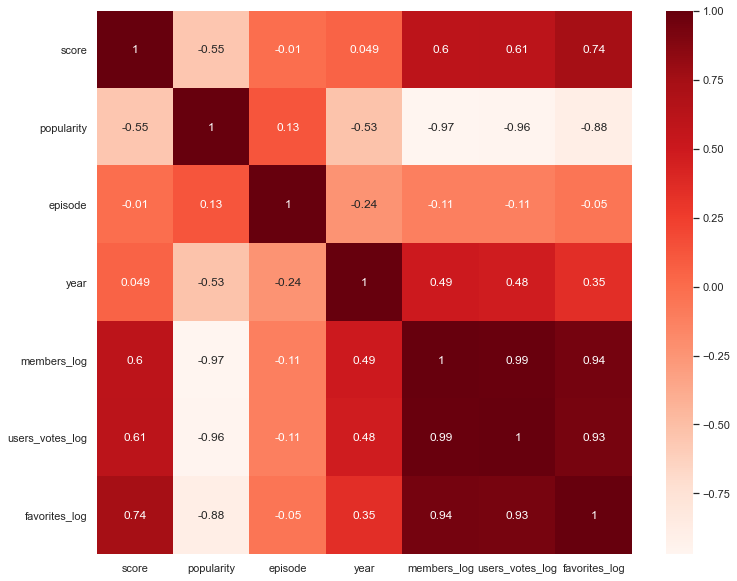

In [10]:
#Using Pearson Correlation (heatmap to see correlation)
plt.figure(figsize=(12,10))
mal_df_subset2= mal_df_subset1.loc[:,['score','popularity','episode','year','members_log', 'users_votes_log',
                             'favorites_log']]
corr = mal_df_subset2.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

In [11]:
#drop highly-correlated features
mal_df_subset2 = mal_df_subset1.drop(['popularity','users_votes_log','members_log'],axis=1)
mal_df_subset2

,score,episode,year,source_Manga,source_Original,source_Other,studios_Madhouse,studios_Others,studios_Production I.G,studios_Sunrise,studios_Toei Animation,premiered_Spring,premiered_Summer,premiered_Winter,favorites_log
0,6.23,44.0,1987.0,0,0,1,0,1,0,0,0,0,0,0,0.000000
1,5.36,10.0,2015.0,0,0,1,0,1,0,0,0,0,0,0,0.693147
2,5.98,300.0,1971.0,0,0,1,0,1,0,0,0,0,0,1,0.693147
3,5.82,1428.0,1976.0,0,0,1,0,1,0,0,0,0,0,0,0.000000
4,6.40,56.0,1980.0,0,0,1,0,1,0,0,0,0,0,0,1.386294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1768,8.18,13.0,2010.0,0,1,0,0,1,0,0,0,1,0,0,10.697339
1769,9.13,24.0,2011.0,0,0,1,0,1,0,0,0,1,0,0,11.818585
1770,8.19,13.0,2016.0,1,0,0,0,1,0,0,0,1,0,0,10.677154
1771,9.22,64.0,2009.0,1,0,0,0,1,0,0,0,1,0,0,12.000444


In [12]:
y=mal_df_subset2['score']
x1=mal_df_subset2.drop(['score'],axis=1)
x=sm.add_constant(x1)
results=sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     201.1
Date:                Sun, 20 Sep 2020   Prob (F-statistic):               0.00
Time:                        13:09:42   Log-Likelihood:                -1215.5
No. Observations:                1773   AIC:                             2461.
Df Residuals:                    1758   BIC:                             2543.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     34.8461      2.353     14.806      0.000      30.230      39.462
episode                   -0.0002      0.000     -1.881      0.060      -0.000    8.51e-06
year                      -0.0145      0.001    -12.354      0.000      -0.017      -0.012
source_Manga               0.2225      0.043      5.216      0.000       0.139       0.306
source_Original            0.0990      0.047      2.093      0.036       0.006       0.192
source_Other               0.1002      0.045      2.205      0.028       0.011       0.189
studios_Madhouse           0.0603      0.079      0.766      0.444      -0.094       0.215
studios_Others            -0.0620      0.058     -1.075      0.283      -0.175       0.051
studios_Production I.G     0.2285      0.096      2.384      0.017       0.041       0.416
studios_Sunrise            0.1334      0.083      1.616      0.106      -0.029       0.295
studios_Toei Animation    -0.0073      0.073     -0.100      0.920      -0.151       0.136
premiered_Spring           0.0369      0.029      1.259      0.208      -0.021       0.094
premiered_Summer          -0.0651      0.034     -1.898      0.058      -0.132       0.002
premiered_Winter          -0.0058      0.033     -0.173      0.863      -0.071       0.060
favorites_log              0.2490      0.005     46.487      0.000       0.238       0.259
==============================================================================
Omnibus:                      129.548   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.337
Skew:                          -0.515   Prob(JB):                     4.79e-52
Kurtosis:                       4.462   Cond. No.                     4.12e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
#Select only features with p<0.05
mal_df_subset= mal_df_subset2.loc[:,['score','studios_Production I.G','year','source_Original','source_Other',
                                      'source_Manga','favorites_log']]
mal_df_subset

,score,studios_Production I.G,year,source_Original,source_Other,source_Manga,favorites_log
0,6.23,0,1987.0,0,1,0,0.000000
1,5.36,0,2015.0,0,1,0,0.693147
2,5.98,0,1971.0,0,1,0,0.693147
3,5.82,0,1976.0,0,1,0,0.000000
4,6.40,0,1980.0,0,1,0,1.386294
...,...,...,...,...,...,...,...
1768,8.18,0,2010.0,1,0,0,10.697339
1769,9.13,0,2011.0,0,1,0,11.818585
1770,8.19,0,2016.0,0,0,1,10.677154
1771,9.22,0,2009.0,0,0,1,12.000444


In [16]:
y=mal_df_subset['score']
x1=mal_df_subset.drop(['score'],axis=1)
x=sm.add_constant(x1)
results=sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     459.0
Date:                Sun, 20 Sep 2020   Prob (F-statistic):               0.00
Time:                        13:11:17   Log-Likelihood:                -1229.9
No. Observations:                1773   AIC:                             2474.
Df Residuals:                    1766   BIC:                             2512.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     36.5867      2.121     17.252      0.000      32.427      40.746
studios_Production I.G     0.2788      0.079      3.532      0.000       0.124       0.434
year                      -0.0154      0.001    -14.560      0.000      -0.018      -0.013
source_Original            0.1190      0.047      2.529      0.012       0.027       0.211
source_Other               0.1046      0.045      2.303      0.021       0.016       0.194
source_Manga               0.2282      0.043      5.342      0.000       0.144       0.312
favorites_log              0.2508      0.005     47.106      0.000       0.240       0.261
==============================================================================
Omnibus:                      130.782   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.506
Skew:                          -0.527   Prob(JB):                     3.25e-51
Kurtosis:                       4.427   Cond. No.                     3.69e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression ,Ridge, RidgeCV
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [18]:
y=mal_df_subset['score']
X=mal_df_subset.drop(['score'],axis=1)

reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.001433
Best score using built-in LassoCV: 0.608787


In [19]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 6 variables and eliminated the other 0 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

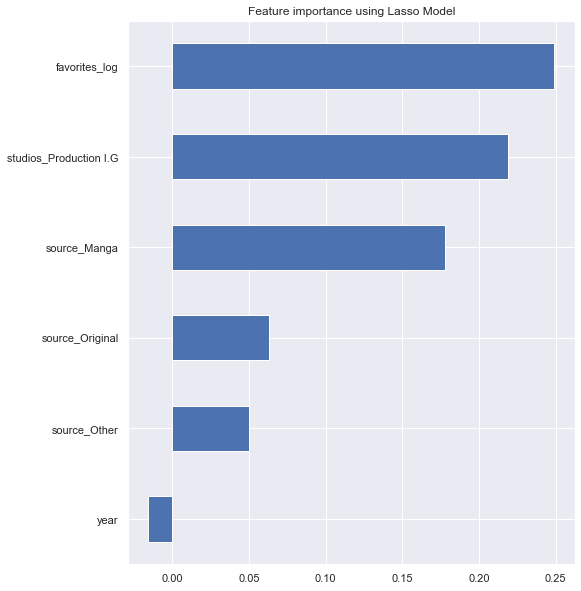

In [20]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [21]:
y=mal_df_subset['score']
X=mal_df_subset.drop(['score'],axis=1)

reg = RidgeCV()
reg.fit(X, y)
print("Best alpha using built-in RidgeCV: %f" % reg.alpha_)
print("Best score using built-in RidgeCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in RidgeCV: 1.000000
Best score using built-in RidgeCV: 0.609315


In [22]:
print("Ridge picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Ridge picked 6 variables and eliminated the other 0 variables


Text(0, 0.5, 'Features')

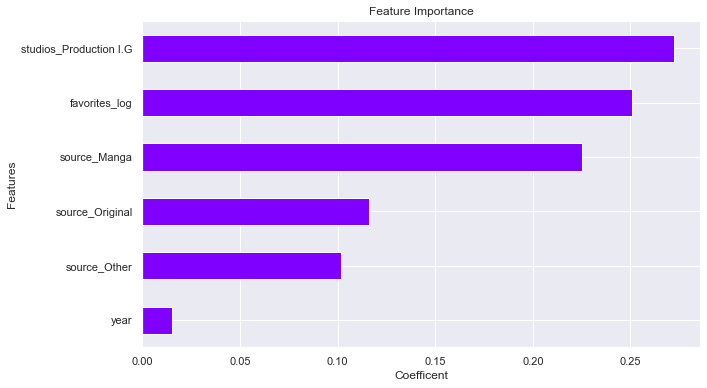

In [23]:
imp_coef = abs(coef).sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
imp_coef.plot(kind = "barh",cmap='rainbow')
plt.title("Feature Importance")
plt.xlabel("Coefficent")
plt.ylabel("Features")

In [24]:
mal_df_subset.to_csv (r'C:\Users\HP\Metis\my_second_project\mal_df_subset_20200920.csv', index = False, header=True)